# Dependencies Setup

In [1]:
!pip install -q -U sentence-transformers datasets hf_xet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 470.2/470.2 kB 8.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.8/494.8 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 62.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.2 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency re

In [2]:
# Melihat detail CPU, RAM, dan sistem operasi
!cat /etc/os-release
!lscpu
!free -h

PRETTY_NAME="Ubuntu 22.04.4 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.4 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy
Architecture:             x86_64
  CPU op-mode(s):         32-bit, 64-bit
  Address sizes:          46 bits physical, 48 bits virtual
  Byte Order:             Little Endian
CPU(s):                   4
  On-line CPU(s) list:    0-3
Vendor ID:                GenuineIntel
  Model name:             Intel(R) Xeon(R) CPU @ 2.00GHz
    CPU family:           6
    Model:                85
    Thread(s) per core:   2
    Core(s) per socket:   2
    Socket(s):            1
    Stepping:             3
    BogoMIPS:             4000.34
    Flags:                fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge m
  

In [3]:
# Melihat GPU (jika menggunakan GPU di notebook settings)
!nvidia-smi

Sun Aug  3 07:40:35 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P0             27W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
!python --version

Python 3.11.11


In [5]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sentence_transformers import SentenceTransformer

from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from copy import deepcopy
import random
import math
import os
import sys
import warnings

2025-08-03 07:40:48.358182: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754206848.549672      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754206848.603704      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:
os.environ["WANDB_DISABLED"] = "true"
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

In [7]:
seed = 42

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [8]:
mpi_1_question_path = "/kaggle/input/asag-raw/pertanyaan_mpi_1.txt"
mpi_1_answers_path = "/kaggle/input/asag-raw/MPI_1.xlsx"

mpi_2_question_path = "/kaggle/input/asag-raw/pertanyaan_mpi_2.txt"
mpi_2_answers_path = "/kaggle/input/asag-raw/MPI_2.xlsx"

siscer_a1_question_path = "/kaggle/input/asag-raw/pertanyaan_siscer_a_1.txt"
siscer_a1_answers_path = "/kaggle/input/asag-raw/SISCER_A1.xlsx"

siscer_b1_question_path = "/kaggle/input/asag-raw/pertanyaan_siscer_b_1.txt"
siscer_b1_answers_path = "/kaggle/input/asag-raw/SISCER_B1.xlsx"

# EDA (Exploratory Data Analysis)

In [9]:
def run_eda(pertanyaan_path, jawaban_path):
    # --- Step 0: Foldering ---
    # Ambil nama file tanpa ekstensi, contoh: "MPI_1"
    dataset_name = os.path.splitext(os.path.basename(jawaban_path))[0]
    
    # Buat path folder tujuan
    output_dir = f"/kaggle/working/eda/{dataset_name}"
    
    # Buat foldernya kalau belum ada
    os.makedirs(output_dir, exist_ok=True)
    
    # --- Step 1: Load Data ---
    with open(pertanyaan_path, 'r') as f:
        pertanyaan = f.readline().strip()
    print("\n\n📌 Pertanyaan:\n", pertanyaan, "\n")

    df = pd.read_excel(jawaban_path)

    # --- Step 2: Memeriksa Struktur Data dan Tipe Kolom ---
    print("📊 Info Struktur Data:")
    print(df.info())
    with open(os.path.join(output_dir, "2-struktur_dataset.txt"), "w") as f:
        df.info(buf=f)

    # --- Step 3: Cek Missing Value dan Baris Duplikat ---
    print("📌 Nilai kosong per kolom:\n", df.isnull().sum())
    missing_indices = df[df.isnull().any(axis=1)].index.tolist()
    if missing_indices:
        print("🔍 Index baris dengan nilai kosong:", missing_indices)

    print("\n🧩 Jumlah baris duplikat:", df.duplicated().sum())
    print("\n🧩 Jumlah baris duplikat (jawaban):", df.duplicated(subset='Jawaban', keep=False).sum())
    duplicate_indices = df[df.duplicated(subset='Jawaban', keep=False)].index.tolist()
    if duplicate_indices:
        print("🔁 Index baris dengan duplikat jawaban:", duplicate_indices)

    df.isnull().sum().to_frame("Jumlah Nilai Kosong").to_csv(os.path.join(output_dir, "3-missing_values.csv"))

    # --- Step 4: Statistik Deskriptif Penilai ---
    print("\n📈 Statistik Deskriptif:")
    print(df[['Penilai 1', 'Penilai 2']].describe())
    df[['Penilai 1', 'Penilai 2']].describe().to_csv(os.path.join(output_dir, "4-statistik_deskriptif.csv"))

    # --- Step 5: Distribusi Skor ---
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df['Penilai 1'], kde=True, bins=10)
    plt.title('Distribusi Penilai 1')
    plt.ylabel('Frekuensi')
    plt.xlabel('Skor')

    plt.subplot(1, 2, 2)
    sns.histplot(df['Penilai 2'], kde=True, bins=10)
    plt.title('Distribusi Penilai 2')
    plt.ylabel('Frekuensi')
    plt.xlabel('Skor')

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "5-distribusi_skor.png"), dpi=300)
    plt.show()

    # --- Step 6: Korelasi Antarpenilai ---
    korelasi = df[['Penilai 1', 'Penilai 2']].corr().iloc[0,1]
    print(f"\n🔗 Korelasi Penilai 1 & Penilai 2: {korelasi:.2f}")

    sns.scatterplot(x='Penilai 1', y='Penilai 2', data=df)
    plt.title('Scatter Plot Penilai 1 vs Penilai 2')
    plt.savefig(os.path.join(output_dir, "6-korelasi_antarpenilai.png"), dpi=300)
    plt.show()

    # --- Step 7: Panjang Jawaban ---
    df['panjang_jawaban'] = df['Jawaban'].astype(str).apply(len)
    print("\n📝 Statistik Panjang Jawaban:\n", df['panjang_jawaban'].describe())
    df[['panjang_jawaban']].describe().to_csv(os.path.join(output_dir, "7-panjang_jawaban.csv"))

    sns.histplot(df['panjang_jawaban'], bins=20, kde=True)
    plt.title('Distribusi Panjang Jawaban')
    plt.ylabel('Frekuensi')
    plt.xlabel('Jumlah Karakter')
    plt.savefig(os.path.join(output_dir, "7-panjang_jawaban.png"), dpi=300)
    plt.show()

    # --- Step 8: Deteksi Outlier Skor (IQR) ---
    # Boxplot Penilai 1 dan Penilai 2
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.boxplot(y='Penilai 1', data=df)
    plt.title('Boxplot Skor Penilai 1')
    plt.ylabel('Skor')

    plt.subplot(1, 2, 2)
    sns.boxplot(y='Penilai 2', data=df)
    plt.title('Boxplot Skor Penilai 2')
    plt.ylabel('Skor')

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "8-outliers.png"), dpi=300)
    plt.show()

In [10]:
# run_eda(mpi_1_question_path, mpi_1_answers_path)
# run_eda(mpi_2_question_path, mpi_2_answers_path)
# run_eda(siscer_a1_question_path, siscer_a1_answers_path)
# run_eda(siscer_b1_question_path, siscer_b1_answers_path)

# Preprocessing Data

In [11]:
# def preprocess_data(pertanyaan_path, jawaban_path, output_dir="/kaggle/working/processed/2-data_formatting"):
# def preprocess_data(pertanyaan_path, jawaban_path, output_dir="/kaggle/working/processed/3-data_cleaning"):
# def preprocess_data(pertanyaan_path, jawaban_path, output_dir="/kaggle/working/processed/4-feature_engineering"):
# def preprocess_data(pertanyaan_path, jawaban_path, output_dir="/kaggle/working/processed/5-data_normalization"):
def preprocess_data(pertanyaan_path, jawaban_path, output_dir="/kaggle/working/processed/"):
    """
    Final preprocessing function for ASAG dataset:
    - Load question and answer files
    - Clean and normalize text
    - Compute average score and normalize
    - Remove outliers recursively using IQR
    - Save to CSV
    """
    print("\n")
    print(os.path.basename(jawaban_path).upper())
    
    # Step 1: Data Loading
    with open(pertanyaan_path, 'r', encoding='utf-8') as file:
        pertanyaan = file.readline().strip()

    df = pd.read_excel(jawaban_path)

    # Step 2: Data Formatting
    # Cek dan tampilkan index baris kosong
    print("Data Formatting")
    missing_idx = df[df.isnull().any(axis=1)].index.tolist()
    print(f"📌 Index baris dengan nilai kosong: {missing_idx}")
    
    df.drop(columns=['Mhs'], errors='ignore', inplace=True)
    df.dropna(inplace=True)

    print(f"Jumlah data setelah drop NA: {len(df)}")
    
    df.insert(0, 'pertanyaan', pertanyaan)
    df.columns = df.columns.str.strip().str.lower()

    # Step 3: Data Cleaning
    print("\nData Cleaning")
    def clean_text(text):
        if isinstance(text, str):
            text = text.lower()
            text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
            text = re.sub(r'\s+', ' ', text).strip()
        return text

    df['pertanyaan'] = df['pertanyaan'].map(clean_text)
    df['jawaban'] = df['jawaban'].map(clean_text)

    # Cek dan tampilkan semua baris duplikat berdasarkan 'jawaban'
    dupe_rows = df[df.duplicated(subset='jawaban', keep=False)]
    print(f"🧩 Baris duplikat lengkap:\n{dupe_rows[['jawaban']]}\n")
    
    before_dupe_idx = set(df.index.tolist())
    before_dupe_len = len(df)
    
    # Drop duplikat, simpan indeks baris yang tetap
    df.drop_duplicates(subset='jawaban', inplace=True)
    
    after_dupe_idx = set(df.index.tolist())
    after_dupe_len = len(df)
    
    # Indeks yang dihapus adalah yang ada di before_dupe_idx tapi tidak ada di after_dupe_idx
    removed_indices = sorted(before_dupe_idx - after_dupe_idx)
    
    print(f"🧩 Jumlah duplikat jawaban yang dihapus: {before_dupe_len - after_dupe_len}")
    print(f"🧩 Indeks baris duplikat yang dihapus: {removed_indices}\n")

    # Step 4: Feature Engineering
    print("\nFeature Engineering")
    df['skor'] = df[['penilai 1', 'penilai 2']].mean(axis=1)
    df.drop(columns=['penilai 1', 'penilai 2'], inplace=True)

    print("Statistik skor sebelum normalisasi:\n", df['skor'].describe())

    # Step 5: Data Normalization
    print("\nData Normalization")
    if df['skor'].max() > 10:
        df['skor'] = (df['skor'] / 100).round(2)
    else:
        df['skor'] = (df['skor'] / 10).round(2)

    print("Statistik skor setelah normalisasi:\n", df['skor'].describe())
    print("\n")

    def remove_outliers_iqr_recursive(df, column='skor'):
        prev_len = -1
        current_df = df.copy()
        iteration = 0

        while prev_len != len(current_df):
            iteration += 1
            prev_len = len(current_df)
            Q1 = current_df[column].quantile(0.25)
            Q3 = current_df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            
            mask = (current_df[column] >= lower) & (current_df[column] <= upper)
            filtered_df = current_df[mask]
            removed_idx = current_df[~mask].index.tolist()
    
            print(f"[Iterasi {iteration}] Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
            print(f"  Batas bawah: {lower:.2f}, Batas atas: {upper:.2f}")
            print(f"  Jumlah data sebelum: {len(current_df)}, setelah: {len(filtered_df)}")
            print(f"  Outlier yang dihapus: {len(removed_idx)}")
            print(f"  Index outlier: {removed_idx}\n")

            current_df = filtered_df

        return current_df

    df = remove_outliers_iqr_recursive(df)

    print(f"Jumlah data akhir: {len(df)}\n")

    # Step 6: Saving
    os.makedirs(output_dir, exist_ok=True)
    
    filename_csv = os.path.basename(jawaban_path).replace('.xlsx', '.csv').lower()
    filename_excel = os.path.basename(jawaban_path).lower()
    
    output_path_csv = os.path.join(output_dir, filename_csv)
    output_path_excel = os.path.join(output_dir, filename_excel)
    
    df.to_csv(output_path_csv, index=True)
    df.to_excel(output_path_excel, index=True)

In [12]:
preprocess_data(mpi_1_question_path, mpi_1_answers_path)
preprocess_data(mpi_2_question_path, mpi_2_answers_path)
preprocess_data(siscer_a1_question_path, siscer_a1_answers_path)
preprocess_data(siscer_b1_question_path, siscer_b1_answers_path)



MPI_1.XLSX
Data Formatting
📌 Index baris dengan nilai kosong: []
Jumlah data setelah drop NA: 91

Data Cleaning
🧩 Baris duplikat lengkap:
Empty DataFrame
Columns: [jawaban]
Index: []

🧩 Jumlah duplikat jawaban yang dihapus: 0
🧩 Indeks baris duplikat yang dihapus: []


Feature Engineering
Statistik skor sebelum normalisasi:
 count    91.000000
mean      5.873626
std       1.996655
min       0.000000
25%       4.500000
50%       6.000000
75%       7.000000
max      10.000000
Name: skor, dtype: float64

Data Normalization
Statistik skor setelah normalisasi:
 count    91.000000
mean      0.587363
std       0.199665
min       0.000000
25%       0.450000
50%       0.600000
75%       0.700000
max       1.000000
Name: skor, dtype: float64


[Iterasi 1] Q1 = 0.45, Q3 = 0.70, IQR = 0.25
  Batas bawah: 0.08, Batas atas: 1.07
  Jumlah data sebelum: 91, setelah: 89
  Outlier yang dihapus: 2
  Index outlier: [89, 90]

[Iterasi 2] Q1 = 0.50, Q3 = 0.70, IQR = 0.20
  Batas bawah: 0.20, Batas atas: 1.

# Loading Preprocessed Dataset

In [13]:
# mpi_1_path = "/kaggle/input/asag-dataset/mpi_1.csv"
# mpi_2_path = "/kaggle/input/asag-dataset/mpi_2.csv"
# siscer_a1_path = "/kaggle/input/asag-dataset/siscer_a1.csv"
# siscer_b1_path = "/kaggle/input/asag-dataset/siscer_b1.csv"

mpi_1_path = "/kaggle/working/processed/mpi_1.csv"
mpi_2_path = "/kaggle/working/processed/mpi_2.csv"
siscer_a1_path = "/kaggle/working/processed/siscer_a1.csv"
siscer_b1_path = "/kaggle/working/processed/siscer_b1.csv"

mpi_1_df = pd.read_csv(mpi_1_path, index_col=0)
mpi_2_df = pd.read_csv(mpi_2_path, index_col=0)
siscer_a1_df = pd.read_csv(siscer_a1_path, index_col=0)
siscer_b1_df = pd.read_csv(siscer_b1_path, index_col=0)

# Loading Pre-Trained Model

## Indonesian Models

In [29]:
indosbert = SentenceTransformer('denaya/indoSBERT-large')

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.23k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/709k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/115 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

## Multilingual Models

In [30]:
paraphrase_multilingual = SentenceTransformer('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')

# Preprocessed Dataset Preparation

## Dataset Embedding

In [73]:
def embed_data(data, model):
    """
    Mengubah pertanyaan dan jawaban menjadi embedding menggunakan model SentenceTransformer.

    Parameters:
    - data (pd.DataFrame): DataFrame yang berisi kolom 'pertanyaan' dan 'jawaban'.
    - model (SentenceTransformer): Model untuk melakukan encoding teks ke dalam embedding.

    Returns:
    - data (pd.DataFrame): DataFrame yang sudah ditambahkan kolom embedding.
    """

    # Encode pertanyaan (hanya satu pertanyaan) dan duplikasikan untuk setiap baris
    question_embedding = model.encode([data['pertanyaan'].iloc[0]], convert_to_numpy=True)[0]
    data['pertanyaan_embedding'] = np.tile(question_embedding, (len(data), 1)).tolist()

    # Encode semua jawaban
    answer_embeddings = model.encode(data['jawaban'].tolist(), convert_to_numpy=True)
    data['jawaban_embedding'] = answer_embeddings.tolist()

    return data

In [74]:
# embed_data(mpi_1_df, indosbert)
# embed_data(mpi_2_df, indosbert)
# embed_data(siscer_a1_df, indosbert)
# embed_data(siscer_b1_df, indosbert)

embed_data(mpi_1_df, paraphrase_multilingual)
embed_data(mpi_2_df, paraphrase_multilingual)
embed_data(siscer_a1_df, paraphrase_multilingual)
embed_data(siscer_b1_df, paraphrase_multilingual)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

,pertanyaan,jawaban,skor,pertanyaan_embedding,jawaban_embedding
0,jelaskan apakah informed search selalu lebih b...,informed search berjalan dengan mempertimbangk...,0.88,"[0.009961560368537903, 0.2180321216583252, -0....","[0.06951138377189636, 0.22766131162643433, -0...."
1,jelaskan apakah informed search selalu lebih b...,ya informed search selaluau lebih baik dibandi...,0.80,"[0.009961560368537903, 0.2180321216583252, -0....","[0.08013662695884705, 0.232050359249115, -0.01..."
2,jelaskan apakah informed search selalu lebih b...,ya karena informed search menggunakan pengetah...,0.82,"[0.009961560368537903, 0.2180321216583252, -0....","[0.07248521596193314, 0.12676343321800232, -0...."
3,jelaskan apakah informed search selalu lebih b...,karena pada informed search terdapat perhitung...,0.80,"[0.009961560368537903, 0.2180321216583252, -0....","[0.0197707898914814, 0.08633478730916977, -0.0..."
4,jelaskan apakah informed search selalu lebih b...,ya karena pencarian menggunakan informed searc...,0.85,"[0.009961560368537903, 0.2180321216583252, -0....","[0.1146596297621727, 0.2499230057001114, -0.00..."
...,...,...,...,...,...
66,jelaskan apakah informed search selalu lebih b...,searching adalah mekanisme pemecahan masalah y...,0.75,"[0.009961560368537903, 0.2180321216583252, -0....","[0.06813281774520874, -0.07341837882995605, -0..."
68,jelaskan apakah informed search selalu lebih b...,informed search seringnya lebih baik dikarenak...,0.80,"[0.009961560368537903, 0.2180321216583252, -0....","[0.06013212725520134, 0.260855108499527, -0.00..."
70,jelaskan apakah informed search selalu lebih b...,dapat dikatakan bahwa informed search cenderun...,0.88,"[0.009961560368537903, 0.2180321216583252, -0....","[0.09169034659862518, 0.25588107109069824, -0...."
71,jelaskan apakah informed search selalu lebih b...,informed search biasanya lebih baik karena inf...,0.80,"[0.009961560368537903, 0.2180321216583252, -0....","[0.055838797241449356, 0.2743753492832184, -0...."


## Cosine Similarity Calc

In [75]:
def calculate_cosine_similarity(data):
    """
    Menghitung cosine similarity antara jawaban dan pertanyaan yang telah dienkode.

    Parameters:
    - data (pd.DataFrame): DataFrame yang sudah memiliki kolom 'jawaban_embedding' dan 'pertanyaan_embedding'.

    Returns:
    - data (pd.DataFrame): DataFrame dengan kolom tambahan 'cosine_similarity'.
    """

    answer_embeddings = np.array(data['jawaban_embedding'].tolist())  # Konversi list embedding ke array numpy
    question_embedding = np.array(data['pertanyaan_embedding'].iloc[0])  # Ambil embedding pertanyaan pertama

    similarities = cosine_similarity(answer_embeddings, [question_embedding]).flatten()
    data['cosine_similarity'] = similarities

    return data

In [76]:
calculate_cosine_similarity(mpi_1_df)
calculate_cosine_similarity(mpi_2_df)
calculate_cosine_similarity(siscer_a1_df)
calculate_cosine_similarity(siscer_b1_df)

,pertanyaan,jawaban,skor,pertanyaan_embedding,jawaban_embedding,cosine_similarity
0,jelaskan apakah informed search selalu lebih b...,informed search berjalan dengan mempertimbangk...,0.88,"[0.009961560368537903, 0.2180321216583252, -0....","[0.06951138377189636, 0.22766131162643433, -0....",0.745380
1,jelaskan apakah informed search selalu lebih b...,ya informed search selaluau lebih baik dibandi...,0.80,"[0.009961560368537903, 0.2180321216583252, -0....","[0.08013662695884705, 0.232050359249115, -0.01...",0.891904
2,jelaskan apakah informed search selalu lebih b...,ya karena informed search menggunakan pengetah...,0.82,"[0.009961560368537903, 0.2180321216583252, -0....","[0.07248521596193314, 0.12676343321800232, -0....",0.752385
3,jelaskan apakah informed search selalu lebih b...,karena pada informed search terdapat perhitung...,0.80,"[0.009961560368537903, 0.2180321216583252, -0....","[0.0197707898914814, 0.08633478730916977, -0.0...",0.706156
4,jelaskan apakah informed search selalu lebih b...,ya karena pencarian menggunakan informed searc...,0.85,"[0.009961560368537903, 0.2180321216583252, -0....","[0.1146596297621727, 0.2499230057001114, -0.00...",0.751279
...,...,...,...,...,...,...
66,jelaskan apakah informed search selalu lebih b...,searching adalah mekanisme pemecahan masalah y...,0.75,"[0.009961560368537903, 0.2180321216583252, -0....","[0.06813281774520874, -0.07341837882995605, -0...",0.552639
68,jelaskan apakah informed search selalu lebih b...,informed search seringnya lebih baik dikarenak...,0.80,"[0.009961560368537903, 0.2180321216583252, -0....","[0.06013212725520134, 0.260855108499527, -0.00...",0.802493
70,jelaskan apakah informed search selalu lebih b...,dapat dikatakan bahwa informed search cenderun...,0.88,"[0.009961560368537903, 0.2180321216583252, -0....","[0.09169034659862518, 0.25588107109069824, -0....",0.859282
71,jelaskan apakah informed search selalu lebih b...,informed search biasanya lebih baik karena inf...,0.80,"[0.009961560368537903, 0.2180321216583252, -0....","[0.055838797241449356, 0.2743753492832184, -0....",0.809212


## Dataset Splitting

In [77]:
def split_data(data, name, seed=seed):
    """
    Membagi dataset menjadi data latih dan uji berdasarkan distribusi cosine similarity dinamis.
    """
    print(name)
    # Step 1: Dapatkan min dan max cosine similarity
    min_score = data['cosine_similarity'].min()
    max_score = data['cosine_similarity'].max()

    # Step 2: Hitung threshold bin dinamis (bagi 3)
    range_score = max_score - min_score
    third = range_score / 3
    bin1 = min_score + third
    bin2 = min_score + 2 * third

    # Step 3: Buat kategori dinamis
    data['score_bin'] = pd.cut(
        data['cosine_similarity'],
        bins=[-float('inf'), bin1, bin2, float('inf')],
        labels=['bottom', 'middle', 'top']
    )

    # Debug: Indeks dan Jumlah Sebelum Sampling
    print(f"Bottom Data (count: {len(data[data['score_bin'] == 'bottom'])}):", data[data['score_bin'] == 'bottom'].index.tolist())
    print(f"Middle Data (count: {len(data[data['score_bin'] == 'middle'])}):", data[data['score_bin'] == 'middle'].index.tolist())
    print(f"Top data (count: {len(data[data['score_bin'] == 'top'] )}):", data[data['score_bin'] == 'top'].index.tolist())

    # Step 4: Hitung ukuran training set
    total_data = len(data)
    train_size = round(total_data * 0.20)

    # Step 5: Balancing kategori
    group_counts = data['score_bin'].value_counts()
    min_count = min(group_counts.min(), train_size // 3)
    top_count = middle_count = bottom_count = min_count

    # Step 6: Sampling per kategori
    top_data = data[data['score_bin'] == 'top'].sample(n=top_count, random_state=seed)
    middle_data = data[data['score_bin'] == 'middle'].sample(n=middle_count, random_state=seed)
    bottom_data = data[data['score_bin'] == 'bottom'].sample(n=bottom_count, random_state=seed)

    # Verifikasi Indeks dan Jumlah Sampel
    print(f"\nBottom Task (count: {len(bottom_data)}):", bottom_data.index.tolist())
    print(f"Middle Task (count: {len(middle_data)}):", middle_data.index.tolist())
    print(f"Top Task (count: {len(top_data)}):", top_data.index.tolist())

    # Sisanya = test
    test_data = data.drop(top_data.index).drop(middle_data.index).drop(bottom_data.index)

    # Debug: Indeks dan Jumlah untuk Test Data per Kategori
    print(f"\nBottom Test (count: {len(test_data[test_data['score_bin'] == 'bottom'])}):", test_data[test_data['score_bin'] == 'bottom'].index.tolist())
    print(f"Middle Test (count: {len(test_data[test_data['score_bin'] == 'middle'])}):", test_data[test_data['score_bin'] == 'middle'].index.tolist())
    print(f"Top Test (count: {len(test_data[test_data['score_bin'] == 'top'] )}):", test_data[test_data['score_bin'] == 'top'].index.tolist())

    # Gabungkan unit pelatihan (tasks)
    tasks = [bottom_data, middle_data, top_data]

    # Print info
    print(f"\nTotal Data: {total_data}")
    print(f"Train Data Count: {sum(len(task) for task in tasks)}")
    print(f"Top: {len(top_data)}, Middle: {len(middle_data)}, Bottom: {len(bottom_data)}")
    print(f"Test Data Count: {len(test_data)}")
    print(f"Cosine Min: {min_score:.2f}, Max: {max_score:.2f}")
    print(f"Bin Thresholds: bottom < {bin1:.2f}, middle < {bin2:.2f}, top ≥ {bin2:.2f}\n\n")

    return tasks, test_data

In [78]:
# # Indo
# raw_tasks_mpi_1, raw_test_mpi_1 = split_data(mpi_1_df, "MPI 1")
# raw_tasks_mpi_2, raw_test_mpi_2 = split_data(mpi_2_df, "MPI 2")
# raw_tasks_siscer_a1, raw_test_siscer_a1 = split_data(siscer_a1_df, "Siscer A1")
# raw_tasks_siscer_b1, raw_test_siscer_b1 = split_data(siscer_b1_df, "Siscer B1")

In [79]:
# Multi
raw_tasks_mpi_1, raw_test_mpi_1 = split_data(mpi_1_df, "MPI 1")
raw_tasks_mpi_2, raw_test_mpi_2 = split_data(mpi_2_df, "MPI 2")
raw_tasks_siscer_a1, raw_test_siscer_a1 = split_data(siscer_a1_df, "Siscer A1")
raw_tasks_siscer_b1, raw_test_siscer_b1 = split_data(siscer_b1_df, "Siscer B1")

MPI 1
Bottom Data (count: 13): [2, 14, 17, 23, 34, 36, 46, 57, 60, 65, 74, 84, 85]
Middle Data (count: 32): [7, 9, 13, 16, 25, 33, 37, 38, 41, 42, 44, 49, 50, 52, 53, 54, 55, 56, 58, 62, 63, 64, 67, 68, 69, 73, 76, 77, 78, 79, 81, 82]
Top data (count: 39): [3, 4, 5, 6, 8, 10, 11, 12, 15, 18, 19, 20, 21, 22, 24, 26, 27, 28, 29, 30, 31, 32, 35, 39, 40, 43, 45, 47, 48, 51, 59, 61, 66, 70, 71, 72, 75, 80, 87]

Bottom Task (count: 5): [84, 65, 2, 60, 36]
Middle Task (count: 5): [79, 54, 69, 56, 41]
Top Task (count: 5): [70, 75, 8, 22, 59]

Bottom Test (count: 8): [14, 17, 23, 34, 46, 57, 74, 85]
Middle Test (count: 27): [7, 9, 13, 16, 25, 33, 37, 38, 42, 44, 49, 50, 52, 53, 55, 58, 62, 63, 64, 67, 68, 73, 76, 77, 78, 81, 82]
Top Test (count: 34): [3, 4, 5, 6, 10, 11, 12, 15, 18, 19, 20, 21, 24, 26, 27, 28, 29, 30, 31, 32, 35, 39, 40, 43, 45, 47, 48, 51, 61, 66, 71, 72, 80, 87]

Total Data: 84
Train Data Count: 15
Top: 5, Middle: 5, Bottom: 5
Test Data Count: 69
Cosine Min: 0.57, Max: 0.86
B

## Training Dataset Formatting

In [81]:
def to_tensor(data):
    X = torch.tensor(data["jawaban_embedding"].tolist(), dtype=torch.float32)
    y = torch.tensor(data["skor"].tolist(), dtype=torch.float32).view(-1, 1) 

    data['X_tensor'] = [X[i] for i in range(len(X))]
    data['y_tensor'] = [y[i] for i in range(len(y))]
    
    return X, y, data.index.tolist()

In [82]:
def input_formatting(tasks, test):
    """
    Memformat unit pelatihan (tasks) dan data uji menjadi input fitur (X) dan target (y) dalam bentuk tensor.

    Parameters:
    - tasks (list of pd.DataFrame): List berisi DataFrame untuk masing-masing kategori.
    - test (pd.DataFrame): Data uji.

    Returns:
    - tasks_tensor (list): List berisi tuple (X, y, index) untuk setiap kategori.
    - test_tensor (tuple): Tuple berisi (X_test, y_test, index_test) untuk data uji.
    """

    # Konversi semua unit pelatihan (tasks)
    tasks_tensor = [to_tensor(task_df) for task_df in tasks]

    # Konversi data uji
    test_tensor = to_tensor(test)

    return tasks_tensor, test_tensor

In [83]:
tasks_mpi_1, test_mpi_1 = input_formatting(raw_tasks_mpi_1, raw_test_mpi_1)
tasks_mpi_2, test_mpi_2 = input_formatting(raw_tasks_mpi_2, raw_test_mpi_2)
tasks_siscer_a1, test_siscer_a1 = input_formatting(raw_tasks_siscer_a1, raw_test_siscer_a1)
tasks_siscer_b1, test_siscer_b1 = input_formatting(raw_tasks_siscer_b1, raw_test_siscer_b1)

# SMAPELoss Definition

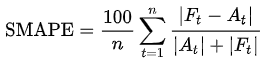

In [84]:
class SMAPELoss(nn.Module):
    """
    Custom Symmetric Mean Absolute Percentage Error (SMAPE) loss function for PyTorch.
    """
    def __init__(self):
        super(SMAPELoss, self).__init__()

    def forward(self, y_pred, y_true):
        epsilon = torch.finfo(y_pred.dtype).eps  # Hindari pembagian dengan nol
        numerator = torch.abs(y_pred - y_true)
        denominator = torch.abs(y_true) + torch.abs(y_pred) + epsilon

        return torch.mean(numerator / denominator) * 100

# Modelling

## Regressor

In [85]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # self.fc1 = nn.Linear(256, 64)
        self.fc1 = nn.Linear(768, 64)
        self.act1 = nn.LeakyReLU()

        self.fc2 = nn.Linear(64, 64)
        self.act2 = nn.LeakyReLU()

        self.fc3 = nn.Linear(64, 1)
        self.act3 = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)

        x = self.fc2(x)
        x = self.act2(x)

        x = self.fc3(x)
        x = self.act3(x)

        return x

In [86]:
# Model Reset Function
def reset_model():
    model = MLP()
    initial_state = deepcopy(model.state_dict())
    
    def _reset():
        m = MLP()
        m.load_state_dict(deepcopy(initial_state))
        return m

    return _reset

In [87]:
model = MLP()
torch.save(model.state_dict(), "/kaggle/working/mlp_model.pth")

## Non-Reptile

In [88]:
# Reptile official implementation (https://openai.com/index/reptile/)
learning_rate0 = 0.02  # stepsize in inner loop
num_epochs = 30000   # number of outer updates; each iteration we sample one task and update on it

In [89]:
def train_baseline(tasks, model_name, loss_func, num_epochs=num_epochs, learning_rate0=learning_rate0):
    """
    Training baseline supervised model tanpa batch size (full batch).

    Parameters:
    - tasks (list of tuple): List (X, y) dari top, middle, bottom.
    - model_name (str): Nama model untuk keperluan plot.
    - loss_type (str): Tipe loss function ('mse', 'mae', 'smape').
    - num_epochs (int): Jumlah epoch training.
    - learning_rate (float): Learning rate optimizer.

    Returns:
    - model (nn.Module): Model terlatih.
    - train_losses (list): List nilai loss per epoch.
    """
    # Gabungkan semua tasks menjadi satu dataset
    X_train = torch.cat([tasks[0][0], tasks[1][0], tasks[2][0]], dim=0)
    y_train = torch.cat([tasks[0][1], tasks[1][1], tasks[2][1]], dim=0)

    model = reset_model()()

    # Pilih loss function
    # loss_fn = nn.L1Loss()
    if loss_func.lower() == "mse":
        loss_fn = nn.MSELoss()
    elif loss_func.lower() == "smape":
        loss_fn = SMAPELoss()
    else:
        raise ValueError(f"Unknown loss function: {loss_func}")

    print(f"Using loss function: {loss_fn.__class__.__name__}")

    train_losses = []

    print(f"{model_name} Training Start...")

    for epoch in range(num_epochs):
        learning_rate = learning_rate0 * (1 - epoch / num_epochs)
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)

        model.train()

        optimizer.zero_grad()
        outputs = model(X_train)
        loss = loss_fn(outputs, y_train)
        loss.backward()
        optimizer.step()

        loss_value = loss.item()
        train_losses.append(loss_value)

    print("Training finished!")

    # Plot training loss
    output_dir = f"/kaggle/working/training"
    os.makedirs(output_dir, exist_ok=True)
    
    plt.figure(figsize=(12, 6))
    plt.plot(train_losses, label="Training Loss", color="black", alpha=0.7)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Training Loss - {model_name}")
    plt.legend()

    # Nama file
    safe_model_name = model_name.lower()
    safe_model_name = re.sub(r"[\s\(\)+]+", "_", safe_model_name)  # spasi, (, ), + jadi "_"
    safe_model_name = safe_model_name.strip("_")
    
    # Nama file grafik dan model
    filename_base = f"{safe_model_name}_{loss_func.lower()}"
    model_path = os.path.join(output_dir, f"{filename_base}.pt")
    plot_path = os.path.join(output_dir, f"{filename_base}.png")
    
    # Simpan model dan grafik seperti biasa
    torch.save(model.state_dict(), model_path)
    plt.savefig(plot_path, dpi=300)
    plt.show()

    # Simpan loss ke CSV
    loss_df = pd.DataFrame({"loss": train_losses})
    loss_csv_path = os.path.join(output_dir, f"{filename_base}_loss.csv")
    loss_df.to_csv(loss_csv_path, index_label="epoch")

    return model, train_losses

In [90]:
# # Indo
# mse_baseline_mpi_1 = train_baseline(tasks_mpi_1, "BASELINE MPI 1 (MSE + Indo)", "mse")
# mse_baseline_mpi_2 = train_baseline(tasks_mpi_2, "BASELINE MPI 2 (MSE + Indo)", "mse")
# mse_baseline_siscer_a1 = train_baseline(tasks_siscer_a1, "BASELINE Siscer A1 (MSE + Indo)", "mse")
# mse_baseline_siscer_b1 = train_baseline(tasks_siscer_b1, "BASELINE Siscer B1 (MSE + Indo)", "mse")
# smape_baseline_mpi_1 = train_baseline(tasks_mpi_1, "BASELINE MPI 1 (SMAPE + Indo)", "smape")
# smape_baseline_mpi_2 = train_baseline(tasks_mpi_2, "BASELINE MPI 2 (SMAPE + Indo)", "smape")
# smape_baseline_siscer_a1 = train_baseline(tasks_siscer_a1, "BASELINE Siscer A1 (SMAPE + Indo)", "smape")
# smape_baseline_siscer_b1 = train_baseline(tasks_siscer_b1, "BASELINE Siscer B1 (SMAPE + Indo)", "smape")

# Multi
# mse_baseline_mpi_1 = train_baseline(tasks_mpi_1, "BASELINE MPI 1 (MSE + Multi)", "mse")
# mse_baseline_mpi_2 = train_baseline(tasks_mpi_2, "BASELINE MPI 2 (MSE + Multi)", "mse")
# mse_baseline_siscer_a1 = train_baseline(tasks_siscer_a1, "BASELINE Siscer A1 (MSE + Multi)", "mse")
# mse_baseline_siscer_b1 = train_baseline(tasks_siscer_b1, "BASELINE Siscer B1 (MSE + Multi)", "mse")
# smape_baseline_mpi_1 = train_baseline(tasks_mpi_1, "BASELINE MPI 1 (SMAPE + Multi)", "smape")
# smape_baseline_mpi_2 = train_baseline(tasks_mpi_2, "BASELINE MPI 2 (SMAPE + Multi)", "smape")
# smape_baseline_siscer_a1 = train_baseline(tasks_siscer_a1, "BASELINE Siscer A1 (SMAPE + Multi)", "smape")
# smape_baseline_siscer_b1 = train_baseline(tasks_siscer_b1, "BASELINE Siscer B1 (SMAPE + Multi)", "smape")

## Reptile

In [91]:
# Reptile official implementation (https://openai.com/index/reptile/)
innerstepsize = 0.02  # stepsize in inner loop
innerepochs = 1       # number of epochs of each inner loop
outerstepsize0 = 0.1  # stepsize of outer optimization, i.e., meta-optimization
num_iterations = 30000   # number of outer updates; each iteration we sample one task and update on it

In [92]:
def reptile_update(model, X_task, y_task, optimizer, loss_fn):
    model.zero_grad()
    y_pred = model(X_task)
    loss = loss_fn(y_pred, y_task)
    loss.backward()
    optimizer.step()
    
    return loss.item()

def train_reptile(tasks, model_name, loss_func):
    model = reset_model()()
    
    # Pilih loss function
    if loss_func.lower() == "mse":
        loss_fn = nn.MSELoss()
    elif loss_func.lower() == "smape":
        loss_fn = SMAPELoss()
    else:
        raise ValueError(f"Unknown loss function: {loss_func}")

    print(f"Using loss function: {loss_fn.__class__.__name__}")

    optimizer = optim.Adam(model.parameters(), lr=innerstepsize)

    task_losses = {i: [] for i in range(len(tasks))}  # Track inner loss per task
    task_iterations = {i: [] for i in range(len(tasks))}
    iteration_losses = []  # Track overall inner loss per iteration

    print(f"{model_name} Training Start...")

    for iteration in range(num_iterations):
        task_id = random.randint(0, len(tasks) - 1)  # Select a task
        X_task, y_task = tasks[task_id][0], tasks[task_id][1]

        weights_before = deepcopy(model.state_dict())
        
        inner_loss = 0
        for _ in range(innerepochs):  # Inner loop training
            loss = reptile_update(model, X_task, y_task, optimizer, loss_fn)
            inner_loss += loss

        avg_inner_loss = inner_loss / innerepochs
        task_losses[task_id].append(avg_inner_loss) # Store loss per task
        task_iterations[task_id].append(iteration)  # Simpan iterasi global-nya
        iteration_losses.append(avg_inner_loss)  # Store overall inner loss

        weights_after = deepcopy(model.state_dict())
        outerstepsize = outerstepsize0 * (1 - iteration / num_iterations)  # Learning rate decay

        with torch.no_grad():  # Update global parameter
            model.load_state_dict({
                name: weights_before[name] + (weights_after[name] - weights_before[name]) * outerstepsize
                for name in weights_before
            })

        if iteration % 1000 == 0:
            print(f"Iteration {iteration} | Task {task_id} | Avg Inner Loss: {avg_inner_loss:.4f}")

    print("Training finished!")

    output_dir = f"/kaggle/working/training"
    os.makedirs(output_dir, exist_ok=True)

    # Nama file
    safe_model_name = model_name.lower()
    safe_model_name = re.sub(r"[\s\(\)+]+", "_", safe_model_name)  # spasi, (, ), + jadi "_"
    safe_model_name = safe_model_name.strip("_")
    
    # Nama file grafik dan model
    filename_base = f"{safe_model_name}_{loss_func.lower()}"
    model_path = os.path.join(output_dir, f"{filename_base}.pt")
    plot_all_loss_path = os.path.join(output_dir, f"{filename_base}_overall_loss.png")
    plot_task_loss_path = os.path.join(output_dir, f"{filename_base}_task_loss.png")

    # Plot overall inner loss trend
    plt.figure(figsize=(12, 6))
    plt.plot(iteration_losses, label="Training Inner Loss", color="black", alpha=0.7)
    plt.xlabel("Iteration")
    plt.ylabel("Inner Loss")
    plt.title(f"Overall Training Inner Loss - {model_name}")
    plt.legend()
    plt.savefig(plot_all_loss_path, dpi=300)
    plt.show()
    
    # Plot inner loss per task
    plt.figure(figsize=(12, 6))
    for task_id, losses in task_losses.items():
        plt.plot(losses, label=f"Task {task_id}")
    plt.xlabel("Iteration")
    plt.ylabel("Inner Loss")
    plt.title(f"Training Inner Loss Per Task - {model_name}")
    plt.legend()
    plt.savefig(plot_task_loss_path, dpi=300)
    plt.show()

    # Simpan model dan grafik seperti biasa
    torch.save(model.state_dict(), model_path)

    # Simpan loss ke CSV
    loss_df = pd.DataFrame({"loss": iteration_losses})
    loss_csv_path = os.path.join(output_dir, f"{filename_base}_loss.csv")
    loss_df.to_csv(loss_csv_path, index_label="iteration")

    for task_id in task_losses:
        df = pd.DataFrame({
            "iteration": task_iterations[task_id],
            "loss": task_losses[task_id]
        })
        df.to_csv(os.path.join(output_dir, f"{filename_base}_task{task_id}_loss.csv"), index=False)

    return model, task_losses, iteration_losses

In [93]:
# # Indo
# mse_reptile_mpi_1 = train_reptile(tasks_mpi_1, "REPTILE MPI 1 (MSE + Indo)", "mse")
# mse_reptile_mpi_2 = train_reptile(tasks_mpi_2, "REPTILE MPI 2 (MSE + Indo)", "mse")
# mse_reptile_siscer_a1 = train_reptile(tasks_siscer_a1, "REPTILE Siscer A1 (MSE + Indo)", "mse")
# mse_reptile_siscer_b1 = train_reptile(tasks_siscer_b1, "REPTILE Siscer B1 (MSE + Indo)", "mse")
# smape_reptile_mpi_1 = train_reptile(tasks_mpi_1, "REPTILE MPI 1 (SMAPE + Indo)", "smape")
# smape_reptile_mpi_2 = train_reptile(tasks_mpi_2, "REPTILE MPI 2 (SMAPE + Indo)", "smape")
# smape_reptile_siscer_a1 = train_reptile(tasks_siscer_a1, "REPTILE Siscer A1 (SMAPE + Indo)", "smape")
# smape_reptile_siscer_b1 = train_reptile(tasks_siscer_b1, "REPTILE Siscer B1 (SMAPE + Indo)", "smape")

# Multi
# mse_reptile_mpi_1 = train_reptile(tasks_mpi_1, "REPTILE MPI 1 (MSE + Multi)", "mse")
# mse_reptile_mpi_2 = train_reptile(tasks_mpi_2, "REPTILE MPI 2 (MSE + Multi)", "mse")
# mse_reptile_siscer_a1 = train_reptile(tasks_siscer_a1, "REPTILE Siscer A1 (MSE + Multi)", "mse")
# mse_reptile_siscer_b1 = train_reptile(tasks_siscer_b1, "REPTILE Siscer B1 (MSE + Multi)", "mse")
# smape_reptile_mpi_1 = train_reptile(tasks_mpi_1, "REPTILE MPI 1 (SMAPE + Multi)", "smape")
# smape_reptile_mpi_2 = train_reptile(tasks_mpi_2, "REPTILE MPI 2 (SMAPE + Multi)", "smape")
# smape_reptile_siscer_a1 = train_reptile(tasks_siscer_a1, "REPTILE Siscer A1 (SMAPE + Multi)", "smape")
# smape_reptile_siscer_b1 = train_reptile(tasks_siscer_b1, "REPTILE Siscer B1 (SMAPE + Multi)", "smape")

# Model Evaluation

In [94]:
def load_model_only(model_path):
    model = reset_model()()
    model.load_state_dict(torch.load(model_path))
    return model

In [ ]:
# Direktori penyimpanan model
base_path = "/kaggle/input/asag/pytorch/default/4"

In [95]:
# # Load Baseline Indo
# mse_baseline_mpi_1 = load_model_only(f"{base_path}/baseline_mpi_1_mse_indo_mse.pt")
# mse_baseline_mpi_2 = load_model_only(f"{base_path}/baseline_mpi_2_mse_indo_mse.pt")
# mse_baseline_siscer_a1 = load_model_only(f"{base_path}/baseline_siscer_a1_mse_indo_mse.pt")
# mse_baseline_siscer_b1 = load_model_only(f"{base_path}/baseline_siscer_b1_mse_indo_mse.pt")

# smape_baseline_mpi_1 = load_model_only(f"{base_path}/baseline_mpi_1_smape_indo_smape.pt")
# smape_baseline_mpi_2 = load_model_only(f"{base_path}/baseline_mpi_2_smape_indo_smape.pt")
# smape_baseline_siscer_a1 = load_model_only(f"{base_path}/baseline_siscer_a1_smape_indo_smape.pt")
# smape_baseline_siscer_b1 = load_model_only(f"{base_path}/baseline_siscer_b1_smape_indo_smape.pt")

# # Load Baseline Multi
# mse_baseline_mpi_1 = load_model_only(f"{base_path}/baseline_mpi_1_mse_multi_mse.pt")
# mse_baseline_mpi_2 = load_model_only(f"{base_path}/baseline_mpi_2_mse_multi_mse.pt")
# mse_baseline_siscer_a1 = load_model_only(f"{base_path}/baseline_siscer_a1_mse_multi_mse.pt")
# mse_baseline_siscer_b1 = load_model_only(f"{base_path}/baseline_siscer_b1_mse_multi_mse.pt")

# smape_baseline_mpi_1 = load_model_only(f"{base_path}/baseline_mpi_1_smape_multi_smape.pt")
# smape_baseline_mpi_2 = load_model_only(f"{base_path}/baseline_mpi_2_smape_multi_smape.pt")
# smape_baseline_siscer_a1 = load_model_only(f"{base_path}/baseline_siscer_a1_smape_multi_smape.pt")
# smape_baseline_siscer_b1 = load_model_only(f"{base_path}/baseline_siscer_b1_smape_multi_smape.pt")

/tmp/ipykernel_31/3509598409.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


In [ ]:
# # Reptile Indo
# mse_reptile_mpi_1 = load_model_only(f"{base_path}/reptile_mpi_1_mse_indo_mse.pt")
# mse_reptile_mpi_2 = load_model_only(f"{base_path}/reptile_mpi_2_mse_indo_mse.pt")
# mse_reptile_siscer_a1 = load_model_only(f"{base_path}/reptile_siscer_a1_mse_indo_mse.pt")
# mse_reptile_siscer_b1 = load_model_only(f"{base_path}/reptile_siscer_b1_mse_indo_mse.pt")

# smape_reptile_mpi_1 = load_model_only(f"{base_path}/reptile_mpi_1_smape_indo_smape.pt")
# smape_reptile_mpi_2 = load_model_only(f"{base_path}/reptile_mpi_2_smape_indo_smape.pt")
# smape_reptile_siscer_a1 = load_model_only(f"{base_path}/reptile_siscer_a1_smape_indo_smape.pt")
# smape_reptile_siscer_b1 = load_model_only(f"{base_path}/reptile_siscer_b1_smape_indo_smape.pt")

# # Reptile Multi
# mse_reptile_mpi_1 = load_model_only(f"{base_path}/reptile_mpi_1_mse_multi_mse.pt")
# mse_reptile_mpi_2 = load_model_only(f"{base_path}/reptile_mpi_2_mse_multi_mse.pt")
# mse_reptile_siscer_a1 = load_model_only(f"{base_path}/reptile_siscer_a1_mse_multi_mse.pt")
# mse_reptile_siscer_b1 = load_model_only(f"{base_path}/reptile_siscer_b1_mse_multi_mse.pt")

# smape_reptile_mpi_1 = load_model_only(f"{base_path}/reptile_mpi_1_smape_multi_smape.pt")
# smape_reptile_mpi_2 = load_model_only(f"{base_path}/reptile_mpi_2_smape_multi_smape.pt")
# smape_reptile_siscer_a1 = load_model_only(f"{base_path}/reptile_siscer_a1_smape_multi_smape.pt")
# smape_reptile_siscer_b1 = load_model_only(f"{base_path}/reptile_siscer_b1_smape_multi_smape.pt")

In [ ]:
## Load Best Model
# mpi_1_best_model = load_model_only(f"{base_path}/reptile_mpi_1_smape_indo_smape.pt")
# mpi_2_best_model = load_model_only(f"{base_path}/reptile_mpi_2_mse_indo_mse.pt")
# siscer_a1_best_model = load_model_only(f"{base_path}/reptile_siscer_a1_mse_multi_mse.pt")
# siscer_b1_best_model = load_model_only(f"{base_path}/reptile_siscer_b1_smape_multi_smape.pt")

In [96]:
# # Baseline
# mse_baseline_mpi_1 = mse_baseline_mpi_1[0]
# mse_baseline_mpi_2 = mse_baseline_mpi_2[0]
# mse_baseline_siscer_a1 = mse_baseline_siscer_a1[0]
# mse_baseline_siscer_b1 = mse_baseline_siscer_b1[0]

# smape_baseline_mpi_1 = smape_baseline_mpi_1[0]
# smape_baseline_mpi_2 = smape_baseline_mpi_2[0]
# smape_baseline_siscer_a1 = smape_baseline_siscer_a1[0]
# smape_baseline_siscer_b1 = smape_baseline_siscer_b1[0]

# # Reptile
# mse_reptile_mpi_1 = mse_reptile_mpi_1[0]
# mse_reptile_mpi_2 = mse_reptile_mpi_2[0]
# mse_reptile_siscer_a1 = mse_reptile_siscer_a1[0]
# mse_reptile_siscer_b1 = mse_reptile_siscer_b1[0]

# smape_reptile_mpi_1 = smape_reptile_mpi_1[0]
# smape_reptile_mpi_2 = smape_reptile_mpi_2[0]
# smape_reptile_siscer_a1 = smape_reptile_siscer_a1[0]
# smape_reptile_siscer_b1 = smape_reptile_siscer_b1[0]

In [97]:
def evaluate_model(model, test, model_name="Model"):
    """
    Mengevaluasi model dengan metrik regresi menggunakan PyTorch dan menampilkan hasil evaluasi per indeks asli.

    Parameters:
    - model (nn.Module): Model yang dievaluasi.
    - test (tuple): Tuple (X_test, y_test, indices) dalam format tensor.
    - model_name (str): Nama model untuk ditampilkan.
    """
    model.eval()
    loss_fn = SMAPELoss()

    X_test, y_test, original_indices = test  # unpack test data and indices

    with torch.no_grad():
        test_preds = model(X_test)
        smape_value = loss_fn(test_preds, y_test).item()

        # Konversi ke list atau numpy
        preds_list = test_preds.squeeze().cpu().numpy().tolist()
        actual_list = y_test.squeeze().cpu().numpy().tolist()
        index_list = original_indices

        # Print header
        print(f"\n{model_name} Evaluation")
        print(f"Final Test SMAPE (Loss): {smape_value:.6f}%")
        # print("\nPrediksi vs Aktual per Indeks Asli:")

        # Print hasil per indeks asli
        for i, (pred, actual) in enumerate(zip(preds_list, actual_list)):
            print(f"[{original_indices[i]}]: Prediksi = {pred:.4f}, Aktual = {actual:.4f}")

        # Simpan ke CSV
        output_dir = f"/kaggle/working/evaluation"
        os.makedirs(output_dir, exist_ok=True)
        
        df = pd.DataFrame({
            'Index': index_list,
            'Prediction': preds_list,
            'Actual': actual_list
        })

        # Format nama file
        safe_model_name = model_name.lower().replace(" ", "_").replace("(", "").replace(")", "").replace("+", "_")
        file_path = os.path.join(output_dir, f"{safe_model_name}.xlsx")

        df.to_excel(file_path, index=False)
        print(f"\nHasil evaluasi disimpan di: {file_path}")

        # Scatter plot Prediksi vs Aktual
        sns.scatterplot(x='Actual', y='Prediction', data=df)
        plt.xlabel("Nilai Aktual")
        plt.ylabel("Nilai Prediksi")
        plt.title(f"Scatter Plot Prediksi vs Aktual - {model_name}")
        plt.grid(True)

        # Simpan plot sebagai file gambar
        plot_path = os.path.join(output_dir, f"{safe_model_name}_scatter_plot.png")
        plt.savefig(plot_path, dpi=300)
        plt.show()
        print(f"Scatter plot disimpan di: {plot_path}")

In [88]:
# # Evaluasi Model Baseline
# # Evaluasi Baseline (MSE+Indo)
# evaluate_model(mse_baseline_mpi_1, test_mpi_1, model_name="BASELINE MPI 1 (MSE+Indo)")
# evaluate_model(mse_baseline_mpi_2, test_mpi_2, model_name="BASELINE MPI 2 (MSE+Indo)")
# evaluate_model(mse_baseline_siscer_a1, test_siscer_a1, model_name="BASELINE Siscer A1 (MSE+Indo)")
# evaluate_model(mse_baseline_siscer_b1, test_siscer_b1, model_name="BASELINE Siscer B1 (MSE+Indo)")

# # Evaluasi Baseline (SMAPE+Indo)
# evaluate_model(smape_baseline_mpi_1, test_mpi_1, model_name="BASELINE MPI 1 (SMAPE+Indo)")
# evaluate_model(smape_baseline_mpi_2, test_mpi_2, model_name="BASELINE MPI 2 (SMAPE+Indo)")
# evaluate_model(smape_baseline_siscer_a1, test_siscer_a1, model_name="BASELINE Siscer A1 (SMAPE+Indo)")
# evaluate_model(smape_baseline_siscer_b1, test_siscer_b1, model_name="BASELINE Siscer B1 (SMAPE+Indo)")

# # Evaluasi Baseline (MSE+Multi)
# evaluate_model(mse_baseline_mpi_1, test_mpi_1, model_name="BASELINE MPI 1 (MSE+Multi)")
# evaluate_model(mse_baseline_mpi_2, test_mpi_2, model_name="BASELINE MPI 2 (MSE+Multi)")
# evaluate_model(mse_baseline_siscer_a1, test_siscer_a1, model_name="BASELINE Siscer A1 (MSE+Multi)")
# evaluate_model(mse_baseline_siscer_b1, test_siscer_b1, model_name="BASELINE Siscer B1 (MSE+Multi)")

# # Evaluasi Baseline (SMAPE+Multi)
# evaluate_model(smape_baseline_mpi_1, test_mpi_1, model_name="BASELINE MPI 1 (SMAPE+Multi)")
# evaluate_model(smape_baseline_mpi_2, test_mpi_2, model_name="BASELINE MPI 2 (SMAPE+Multi)")
# evaluate_model(smape_baseline_siscer_a1, test_siscer_a1, model_name="BASELINE Siscer A1 (SMAPE+Multi)")
# evaluate_model(smape_baseline_siscer_b1, test_siscer_b1, model_name="BASELINE Siscer B1 (SMAPE+Multi)")

print("\n")

# Evaluasi Model Reptile
# # Evaluasi Reptile (MSE+Indo)
# evaluate_model(mse_reptile_mpi_1, test_mpi_1, model_name="REPTILE MPI 1 (MSE+Indo)")
# evaluate_model(mse_reptile_mpi_2, test_mpi_2, model_name="REPTILE MPI 2 (MSE+Indo)")
# evaluate_model(mse_reptile_siscer_a1, test_siscer_a1, model_name="REPTILE Siscer A1 (MSE+Indo)")
# evaluate_model(mse_reptile_siscer_b1, test_siscer_b1, model_name="REPTILE Siscer B1 (MSE+Indo)")

# # Evaluasi Reptile (SMAPE+Indo)
# evaluate_model(smape_reptile_mpi_1, test_mpi_1, model_name="REPTILE MPI 1 (SMAPE+Indo)")
# evaluate_model(smape_reptile_mpi_2, test_mpi_2, model_name="REPTILE MPI 2 (SMAPE+Indo)")
# evaluate_model(smape_reptile_siscer_a1, test_siscer_a1, model_name="REPTILE Siscer A1 (SMAPE+Indo)")
# evaluate_model(smape_reptile_siscer_b1, test_siscer_b1, model_name="REPTILE Siscer B1 (SMAPE+Indo)")

# # Evaluasi Reptile (MSE+Multi)
# evaluate_model(mse_reptile_mpi_1, test_mpi_1, model_name="REPTILE MPI 1 (MSE+Multi)")
# evaluate_model(mse_reptile_mpi_2, test_mpi_2, model_name="REPTILE MPI 2 (MSE+Multi)")
# evaluate_model(mse_reptile_siscer_a1, test_siscer_a1, model_name="REPTILE Siscer A1 (MSE+Multi)")
# evaluate_model(mse_reptile_siscer_b1, test_siscer_b1, model_name="REPTILE Siscer B1 (MSE+Multi)")

# # Evaluasi Reptile (SMAPE+Multi)
# evaluate_model(smape_reptile_mpi_1, test_mpi_1, model_name="REPTILE MPI 1 (SMAPE+Multi)")
# evaluate_model(smape_reptile_mpi_2, test_mpi_2, model_name="REPTILE MPI 2 (SMAPE+Multi)")
# evaluate_model(smape_reptile_siscer_a1, test_siscer_a1, model_name="REPTILE Siscer A1 (SMAPE+Multi)")
# evaluate_model(smape_reptile_siscer_b1, test_siscer_b1, model_name="REPTILE Siscer B1 (SMAPE+Multi)")


BASELINE MPI 1 (MSE+Multi) Evaluation
Final Test SMAPE (Loss): 19.248865%

Hasil evaluasi disimpan di: /kaggle/working/evaluation/baseline_mpi_1_mse_multi.xlsx

BASELINE MPI 2 (MSE+Multi) Evaluation
Final Test SMAPE (Loss): 21.355181%

Hasil evaluasi disimpan di: /kaggle/working/evaluation/baseline_mpi_2_mse_multi.xlsx

BASELINE Siscer A1 (MSE+Multi) Evaluation
Final Test SMAPE (Loss): 13.958761%

Hasil evaluasi disimpan di: /kaggle/working/evaluation/baseline_siscer_a1_mse_multi.xlsx

BASELINE Siscer B1 (MSE+Multi) Evaluation
Final Test SMAPE (Loss): 7.961742%

Hasil evaluasi disimpan di: /kaggle/working/evaluation/baseline_siscer_b1_mse_multi.xlsx

BASELINE MPI 1 (SMAPE+Multi) Evaluation
Final Test SMAPE (Loss): 12.361013%

Hasil evaluasi disimpan di: /kaggle/working/evaluation/baseline_mpi_1_smape_multi.xlsx

BASELINE MPI 2 (SMAPE+Multi) Evaluation
Final Test SMAPE (Loss): 39.336842%

Hasil evaluasi disimpan di: /kaggle/working/evaluation/baseline_mpi_2_smape_multi.xlsx

BASELINE S


Model Siscer A1 Terbaik Evaluation
Final Test SMAPE (Loss): 5.100619%

Hasil evaluasi disimpan di: /kaggle/working/evaluation/model_siscer_a1_terbaik.xlsx


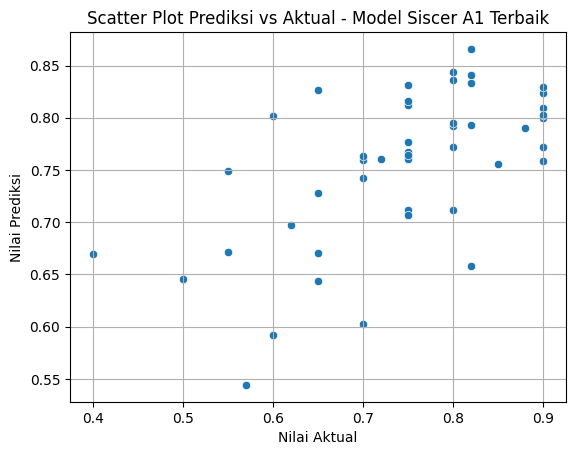

Scatter plot disimpan di: /kaggle/working/evaluation/model_siscer_a1_terbaik_scatter_plot.png

Model Siscer B1 Terbaik Evaluation
Final Test SMAPE (Loss): 2.358364%

Hasil evaluasi disimpan di: /kaggle/working/evaluation/model_siscer_b1_terbaik.xlsx


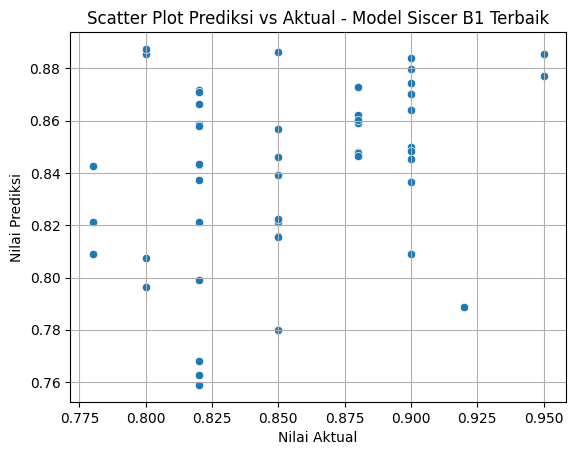

Scatter plot disimpan di: /kaggle/working/evaluation/model_siscer_b1_terbaik_scatter_plot.png


In [98]:
## Evaluate Best Model
# evaluate_model(mpi_1_best_model, test_mpi_1, model_name="Model MPI 1 Terbaik")
# evaluate_model(mpi_2_best_model, test_mpi_2, model_name="Model MPI 2 Terbaik")
# evaluate_model(siscer_a1_best_model, test_siscer_a1, model_name="Model Siscer A1 Terbaik")
# evaluate_model(siscer_b1_best_model, test_siscer_b1, model_name="Model Siscer B1 Terbaik")

# Lampiran

## Perhitungan Vektor Embedding

In [144]:
import torch
from transformers import AutoModel, AutoTokenizer
from sentence_transformers import SentenceTransformer

# Pilih device (GPU jika tersedia)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Ambil teks dari dataframe
text = siscer_a1_df['pertanyaan'][0]

### IndoSBERT

In [145]:
# Load model SentenceTransformer
model = SentenceTransformer('denaya/indoSBERT-large')
tokenizer = model.tokenizer  # Tokenizer bawaan dari model
print(model)

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 1024, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Dense({'in_features': 1024, 'out_features': 256, 'bias': True, 'activation_function': 'torch.nn.modules.activation.Tanh'})
)


In [146]:
# Tokenisasi
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)

# Pindahkan ke device yang sama dengan model
inputs = {key: value.to(device) for key, value in inputs.items()}

# Decode kembali token untuk melihat hasil tokenisasi per kata
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

# Tampilkan hasil tokenisasi
print("📌 **Tokenized Words:**")
print(tokens)

# Tampilkan Input IDs & Attention Mask
print("\n📌 **Input IDs:**")
print(inputs['input_ids'])

print("\n📌 **Attention Mask:**")
print(inputs['attention_mask'])

📌 **Tokenized Words:**
['[CLS]', 'jelaskan', 'perbedaan', 'antara', 'it', '##erat', '##ive', 'search', '##ing', 'dan', 'non', 'it', '##erat', '##ive', 'search', '##ing', '[SEP]']

📌 **Input IDs:**
tensor([[   2, 7370, 2217,  644, 1701, 7031, 3732, 4150,   55,   41, 2293, 1701,
         7031, 3732, 4150,   55,    3]], device='cuda:0')

📌 **Attention Mask:**
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')


In [147]:
# Load BERT Model
transformer_model = model[0].auto_model.to(device)

# Forward pass
with torch.no_grad():
    outputs = transformer_model(**inputs, output_hidden_states=True)

# Ambil semua hidden states
hidden_states = outputs.hidden_states

In [148]:
# Ambil layer embedding dari model
embeddings = transformer_model.embeddings

# Token, Segment, dan Positional Embeddings
input_ids = inputs['input_ids']
token_type_ids = inputs.get('token_type_ids', torch.zeros_like(input_ids))  # BERT-style segment IDs
attention_mask = inputs['attention_mask']

token_embeddings = embeddings.word_embeddings(input_ids)  # Token Embedding
position_ids = torch.arange(input_ids.size(1), dtype=torch.long, device=device).unsqueeze(0)
positional_embeddings = embeddings.position_embeddings(position_ids)  # Positional Embedding
segment_embeddings = embeddings.token_type_embeddings(token_type_ids)  # (B, L, H)
summed_embeddings = token_embeddings + positional_embeddings + segment_embeddings # Sum embeddings
normalized_embeddings = embeddings.LayerNorm(summed_embeddings)  # Layer Normalization

print("\nToken Embeddings:", token_embeddings[:5])
print("\nSegment Embeddings:", segment_embeddings[:5])
print("\nPositional Embeddings:", positional_embeddings[:5])
print("\nSummed Embeddings (Token + Positional):", summed_embeddings[:5])
# print("\nLayer Normalized Embeddings:", normalized_embeddings[:5])


Token Embeddings: tensor([[[ 0.0051, -0.0106, -0.0232,  ..., -0.0064, -0.0055,  0.0081],
         [-0.0030,  0.0391, -0.0237,  ...,  0.0197,  0.0306, -0.0978],
         [ 0.0571, -0.0233, -0.0437,  ..., -0.0592,  0.0650, -0.0342],
         ...,
         [ 0.0296, -0.0146, -0.0314,  ...,  0.0170, -0.0109, -0.0212],
         [-0.0268,  0.0159,  0.0371,  ...,  0.0544, -0.0500,  0.0434],
         [-0.0055,  0.0201, -0.0175,  ..., -0.0051,  0.0061, -0.0147]]],
       device='cuda:0', grad_fn=<SliceBackward0>)

Segment Embeddings: tensor([[[ 0.0103,  0.0010,  0.0202,  ..., -0.0122, -0.0069, -0.0028],
         [ 0.0103,  0.0010,  0.0202,  ..., -0.0122, -0.0069, -0.0028],
         [ 0.0103,  0.0010,  0.0202,  ..., -0.0122, -0.0069, -0.0028],
         ...,
         [ 0.0103,  0.0010,  0.0202,  ..., -0.0122, -0.0069, -0.0028],
         [ 0.0103,  0.0010,  0.0202,  ..., -0.0122, -0.0069, -0.0028],
         [ 0.0103,  0.0010,  0.0202,  ..., -0.0122, -0.0069, -0.0028]]],
       device='cuda:0', gr

In [149]:
encoder_input = hidden_states[0]  # Output sebelum masuk ke encoder pertama

print("\nEncoder Layer Input:", encoder_input[:5])


Encoder Layer Input: tensor([[[-0.0313,  0.0223,  0.0023,  ..., -0.0544,  0.0224, -0.0277],
         [-0.0159,  0.8362,  0.2451,  ...,  0.6036,  0.9042, -0.9510],
         [ 0.5737, -0.3474, -0.0430,  ..., -0.6736,  1.0769, -0.1511],
         ...,
         [ 0.7213,  0.0688,  0.0073,  ...,  0.6104,  0.1149, -0.0972],
         [-0.1897,  0.1123,  0.7041,  ...,  0.9242, -0.7413,  0.5365],
         [ 0.0998,  0.0562,  0.0162,  ..., -0.0284,  0.2084, -0.1314]]],
       device='cuda:0')


In [150]:
# Ambil hidden states terakhir
last_hidden_state = outputs.last_hidden_state

print("\nEncoder Layer Output:", last_hidden_state[:5])


Encoder Layer Output: tensor([[[-0.2511, -1.1582,  1.0771,  ..., -0.5248,  0.5544,  1.8930],
         [-0.5021,  2.0371,  0.3445,  ..., -0.8850,  0.3390,  1.2212],
         [-0.1946,  0.6715, -0.0258,  ...,  0.0493, -0.1279,  1.5401],
         ...,
         [ 0.1863, -0.5459,  0.2000,  ...,  1.1387,  0.8953,  0.8061],
         [-0.0593, -0.0840,  0.5837,  ...,  0.5653,  0.2807,  2.0261],
         [-0.2511, -1.1582,  1.0771,  ..., -0.5248,  0.5544,  1.8930]]],
       device='cuda:0')


In [151]:
# Ekspansi Attention Mask
attention_expanded = attention_mask.unsqueeze(-1).expand(last_hidden_state.size())

# Sum embeddings berdasarkan mask
sum_embeddings = torch.sum(last_hidden_state * attention_expanded, dim=1)
sum_mask = torch.clamp(attention_expanded.sum(dim=1), min=1e-9)

# Mean Pooling
pooled_output = sum_embeddings / sum_mask

print("\nPooling Layer Input:", last_hidden_state[:5])
print("\nPooling Layer Output (Mean Pooling):", pooled_output[:5])


Pooling Layer Input: tensor([[[-0.2511, -1.1582,  1.0771,  ..., -0.5248,  0.5544,  1.8930],
         [-0.5021,  2.0371,  0.3445,  ..., -0.8850,  0.3390,  1.2212],
         [-0.1946,  0.6715, -0.0258,  ...,  0.0493, -0.1279,  1.5401],
         ...,
         [ 0.1863, -0.5459,  0.2000,  ...,  1.1387,  0.8953,  0.8061],
         [-0.0593, -0.0840,  0.5837,  ...,  0.5653,  0.2807,  2.0261],
         [-0.2511, -1.1582,  1.0771,  ..., -0.5248,  0.5544,  1.8930]]],
       device='cuda:0')

Pooling Layer Output (Mean Pooling): tensor([[ 0.2918, -0.2811,  0.4566,  ...,  0.4649,  0.2746,  1.2078]],
       device='cuda:0')


In [152]:
dense_input = {"sentence_embedding": pooled_output}
dense_output = dense_layer(dense_input)

In [153]:
final_embedding = dense_output["sentence_embedding"]
print("\nFinal Embeddings: ", final_embedding[:5])


Final Embeddings:  tensor([[-5.3869e-02, -6.5660e-01,  4.7022e-03,  2.7389e-01,  3.3587e-02,
          2.1816e-01, -6.9897e-02,  4.5478e-01,  5.0301e-01, -8.4983e-02,
         -9.9471e-02, -1.4064e-01, -1.4115e-05, -1.2882e-01,  1.6484e-01,
         -2.7839e-01,  3.0050e-02,  7.1982e-01,  4.3234e-01, -3.1404e-01,
         -7.1897e-02,  8.3852e-02,  2.4995e-01,  2.7920e-01, -9.6424e-02,
         -3.4697e-01,  1.6726e-01,  2.0959e-01, -1.6674e-02, -1.8537e-02,
         -7.4643e-02, -7.8293e-02, -4.4645e-01,  6.8164e-01,  8.8108e-02,
         -4.7306e-01, -6.3020e-01,  3.7989e-01, -2.9620e-01,  2.4912e-01,
          5.6010e-01,  5.6615e-01, -9.7333e-03,  5.4655e-01, -7.0441e-01,
          1.5353e-02,  1.5506e-03, -6.4703e-02, -2.9327e-01,  3.1593e-01,
         -3.8748e-02, -2.2940e-01, -5.4614e-01,  2.6798e-01,  4.0932e-01,
          4.1604e-01,  2.0850e-01,  6.2562e-01,  7.5649e-01,  6.1410e-01,
          3.7809e-01, -2.1777e-01,  1.8305e-01, -2.8933e-02,  8.3777e-02,
         -6.9711e-

### Multilingual SBERT

In [154]:
# Load model SentenceTransformer
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')
tokenizer = model.tokenizer  # Tokenizer bawaan dari model
print(model)

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: XLMRobertaModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
)


In [155]:
# Tokenisasi
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)

# Pindahkan ke device yang sama dengan model
inputs = {key: value.to(device) for key, value in inputs.items()}

# Decode kembali token untuk melihat hasil tokenisasi per kata
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

# Tampilkan hasil tokenisasi
print("📌 **Tokenized Words:**")
print(tokens)

# Tampilkan Input IDs & Attention Mask
print("\n📌 **Input IDs:**")
print(inputs['input_ids'])

print("\n📌 **Attention Mask:**")
print(inputs['attention_mask'])

📌 **Tokenized Words:**
['<s>', '▁jelas', 'kan', '▁perbedaan', '▁antara', '▁i', 'ter', 'ative', '▁searching', '▁dan', '▁non', '▁i', 'ter', 'ative', '▁searching', '</s>']

📌 **Input IDs:**
tensor([[     0,  16767,    331, 105841,   7253,     17,    720,  45023, 157318,
            123,    351,     17,    720,  45023, 157318,      2]],
       device='cuda:0')

📌 **Attention Mask:**
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')


In [156]:
# Load XLM-Roberta Model
transformer_model = model[0].auto_model.to(device)

# Forward pass
with torch.no_grad():
    outputs = transformer_model(**inputs, output_hidden_states=True)

# Ambil semua hidden states
hidden_states = outputs.hidden_states

In [157]:
# Ambil layer embedding dari model
embeddings = transformer_model.embeddings

# Token, Segment, dan Positional Embeddings
input_ids = inputs['input_ids']
attention_mask = inputs['attention_mask']

token_embeddings = embeddings.word_embeddings(input_ids)  # Token Embedding
position_ids = torch.arange(input_ids.size(1), dtype=torch.long, device=device).unsqueeze(0)
positional_embeddings = embeddings.position_embeddings(position_ids)  # Positional Embedding

# Model XLM-R tidak memiliki segment embeddings seperti BERT
summed_embeddings = token_embeddings + positional_embeddings  # Sum embeddings
# normalized_embeddings = embeddings.LayerNorm(summed_embeddings)  # Layer Normalization

print("\nToken Embeddings:", token_embeddings[:5])
print("\nPositional Embeddings:", positional_embeddings[:5])
print("\nSummed Embeddings (Token + Positional):", summed_embeddings[:5])
print("\nLayer Normalized Embeddings:", normalized_embeddings[:5])


Token Embeddings: tensor([[[ 0.0662,  0.0555,  0.0743,  ...,  0.0534,  0.0464,  0.0255],
         [-0.0178,  0.1392, -0.1407,  ...,  0.0802,  0.0445,  0.0409],
         [ 0.1409,  0.0824, -0.0726,  ...,  0.0046, -0.0382,  0.0486],
         ...,
         [ 0.0565,  0.0391, -0.0674,  ...,  0.0344,  0.0238, -0.0123],
         [ 0.0895, -0.0119, -0.0080,  ...,  0.1193, -0.0648,  0.0636],
         [ 0.0888,  0.0866,  0.0601,  ...,  0.0713, -0.0012,  0.0890]]],
       device='cuda:0', grad_fn=<SliceBackward0>)

Positional Embeddings: tensor([[[ 2.0832e-02, -2.5618e-03, -2.4283e-03,  ...,  2.1777e-03,
          -9.2622e-03, -1.0499e-02],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [-4.4225e-02, -2.0330e-02, -7.1911e-02,  ..., -1.7778e-02,
          -1.2097e-01, -8.9720e-05],
         ...,
         [-1.1399e-02,  2.3370e-02, -1.1033e-02,  ...,  3.9341e-03,
          -5.5733e-03, -3.3871e-02],
         [-6.0430e-03,  2.1436e

In [158]:
encoder_input = hidden_states[0]  # Output sebelum masuk ke encoder pertama

print("\nEncoder Layer Input:", encoder_input[:5])


Encoder Layer Input: tensor([[[-1.1519e-01,  5.4723e-02, -3.9526e-02,  ...,  5.8054e-02,
          -1.8848e-01, -4.3465e-02],
         [-4.5186e-01,  6.1696e-01, -1.1722e+00,  ...,  1.7849e-01,
           3.3272e-01, -7.0383e-04],
         [ 8.1068e-01,  3.3205e-01, -8.7907e-01,  ..., -3.2513e-01,
          -2.5326e-01, -6.0913e-02],
         ...,
         [ 1.4559e-02,  1.4247e-01, -5.4109e-01,  ..., -8.6297e-02,
           3.2938e-01, -7.2774e-01],
         [ 3.2176e-01, -1.6268e-01, -2.1588e-01,  ...,  4.3591e-01,
          -3.0110e-01, -4.5567e-02],
         [ 5.5738e-02,  2.1464e-01,  1.3319e-01,  ..., -1.7720e-01,
          -1.0436e-01,  4.7915e-02]]], device='cuda:0')


In [159]:
# Ambil hidden states terakhir
last_hidden_state = outputs.last_hidden_state

print("\nEncoder Layer Output:", last_hidden_state[:5])


Encoder Layer Output: tensor([[[ 0.1306, -0.0140, -0.0108,  ..., -0.0147, -0.0807,  0.0338],
         [-0.0339, -0.1582, -0.0126,  ..., -0.0029,  0.0233,  0.0878],
         [ 0.0211, -0.1167, -0.0133,  ..., -0.0326, -0.0133,  0.1034],
         ...,
         [ 0.1181, -0.0968, -0.0127,  ...,  0.0904, -0.0618,  0.0568],
         [ 0.1417,  0.1101, -0.0115,  ..., -0.0468, -0.2305,  0.1418],
         [ 0.1817, -0.0473, -0.0129,  ...,  0.0198, -0.0606,  0.1510]]],
       device='cuda:0')


In [160]:
# Ekspansi Attention Mask
attention_expanded = attention_mask.unsqueeze(-1).expand(last_hidden_state.size())

# Sum embeddings berdasarkan mask
sum_embeddings = torch.sum(last_hidden_state * attention_expanded, dim=1)
sum_mask = torch.clamp(attention_expanded.sum(dim=1), min=1e-9)

# Mean Pooling
pooled_output = sum_embeddings / sum_mask

print("\nPooling Layer Input:", last_hidden_state[:5])
print("\nPooling Layer Output (Mean Pooling):", pooled_output[:5])


Pooling Layer Input: tensor([[[ 0.1306, -0.0140, -0.0108,  ..., -0.0147, -0.0807,  0.0338],
         [-0.0339, -0.1582, -0.0126,  ..., -0.0029,  0.0233,  0.0878],
         [ 0.0211, -0.1167, -0.0133,  ..., -0.0326, -0.0133,  0.1034],
         ...,
         [ 0.1181, -0.0968, -0.0127,  ...,  0.0904, -0.0618,  0.0568],
         [ 0.1417,  0.1101, -0.0115,  ..., -0.0468, -0.2305,  0.1418],
         [ 0.1817, -0.0473, -0.0129,  ...,  0.0198, -0.0606,  0.1510]]],
       device='cuda:0')

Pooling Layer Output (Mean Pooling): tensor([[ 1.0148e-01, -4.8151e-02, -1.2585e-02,  5.2684e-02, -1.2589e-01,
          1.2940e-02, -9.2814e-02,  5.9806e-02,  2.1738e-02, -8.0015e-03,
         -5.2840e-02, -7.5277e-02, -6.1154e-02, -1.5659e-01, -8.9302e-02,
         -1.2400e-01,  8.1045e-02,  3.4034e-02, -8.2977e-02,  7.4830e-02,
          4.4982e-02,  5.3586e-03, -6.5937e-02, -1.6007e-03,  6.1900e-02,
         -4.0227e-02, -8.5099e-02,  5.8765e-02,  4.0322e-02, -8.1379e-02,
          5.9910e-02, -9.0675e

## Perhitungan Korelasi Pearson

In [161]:
import numpy as np
from scipy.stats import pearsonr

# 1. Masukkan data
penilai_1 = np.array([
    60, 90, 80, 90, 80, 60, 80, 60, 65, 80, 65, 80, 85, 5, 85, 70,
    80, 30, 80, 80, 70, 50, 50, 90, 90, 85, 85, 90, 85, 85, 85, 80,
    90, 90, 90, 90, 70, 90, 80, 80, 80, 65, 90, 80, 60, 70, 70, 60,
    65, 80, 60, 70, 70, 5, 65, 80, 90, 90, 70, 70, 60, 80, 70, 40
])

penilai_2 = np.array([
    50, 70, 50, 90, 85, 60, 50, 50, 60, 60, 85, 70, 90, 5, 95, 60,
    70, 20, 70, 90, 80, 50, 60, 70, 70, 80, 70, 90, 80, 80, 80, 60,
    90, 90, 90, 90, 80, 90, 70, 80, 50, 50, 90, 60, 50, 80, 85, 60,
    80, 70, 50, 90, 70, 10, 10, 70, 90, 95, 60, 50, 80, 80, 60, 40
])

# 2. Hitung rata-rata
mean_x = np.mean(penilai_1)
mean_y = np.mean(penilai_2)

# 3. Hitung deviasi
deviasi_x = penilai_1 - mean_x
deviasi_y = penilai_2 - mean_y

# 4. Hasil kali deviasi
hasil_kali_deviasi = deviasi_x * deviasi_y

# 5. Kuadrat deviasi
deviasi_x2 = deviasi_x ** 2
deviasi_y2 = deviasi_y ** 2

# 6. Hitung pembilang dan penyebut
pembilang = np.sum(hasil_kali_deviasi)
penyebut = np.sqrt(np.sum(deviasi_x2)) * np.sqrt(np.sum(deviasi_y2))

# 7. Hitung korelasi Pearson
r_manual = pembilang / penyebut

# 8. Validasi dengan fungsi scipy
r_scipy, p_value = pearsonr(penilai_1, penilai_2)

# 9. Tampilkan hasil
print("Rata-rata Penilai 1 (X̄):", round(mean_x, 2))
print("Rata-rata Penilai 2 (Ȳ):", round(mean_y, 2))
print("Pembilang:", round(pembilang, 2))
print("Penyebut:", round(penyebut, 2))
# print("Kuadrat deviasi x:", deviasi_x2)
# print("Kuadrat deviasi y:", deviasi_y2)
print("Jumlah Kuadrat deviasi x:", np.sum(deviasi_x2))
print("Jumlah Kuadrat deviasi y:", np.sum(deviasi_y2))
print("Korelasi Pearson (manual):", round(r_manual, 4))
print("Korelasi Pearson (scipy):", round(r_scipy, 4))
print("p-value:", round(p_value, 4))

Rata-rata Penilai 1 (X̄): 72.97
Rata-rata Penilai 2 (Ȳ): 68.12
Pembilang: 18231.25
Penyebut: 23644.96
Jumlah Kuadrat deviasi x: 20385.9375
Jumlah Kuadrat deviasi y: 27425.0
Korelasi Pearson (manual): 0.771
Korelasi Pearson (scipy): 0.771
p-value: 0.0
